In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
ds = pd.read_csv("data.csv")

In [3]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
#scaling the data 
ds['target'].replace({1:0, 2:1}, inplace=True)

In [5]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
size = ds['target'].value_counts()
print(size)

0    150
1    120
Name: target, dtype: int64


In [7]:
X = ds.drop(columns='target', axis=1)
Y = ds['target']

In [8]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     70    1   4       130   322    0        2      109      0      2.4   
1     67    0   3       115   564    0        2      160      0      1.6   
2     57    1   2       124   261    0        0      141      0      0.3   
3     64    1   4       128   263    0        0      105      1      0.2   
4     74    0   2       120   269    0        2      121      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
265   52    1   3       172   199    1        0      162      0      0.5   
266   44    1   2       120   263    0        0      173      0      0.0   
267   56    0   2       140   294    0        2      153      0      1.3   
268   57    1   4       140   192    0        0      148      0      0.4   
269   67    1   4       160   286    0        2      108      1      1.5   

     slope  ca  thal  
0        2   3     3  
1        2   0     7  
2        1   0    

In [9]:
print(Y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(270, 13) (189, 13) (81, 13)


In [12]:
#MODEL SELECTION 
model = RandomForestClassifier(n_estimators = 20, random_state =15)

In [13]:
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20, random_state=15)

In [14]:
#first training data on the train split
prediction_train = model.predict(X_train)

In [15]:
train_data_accuracy = accuracy_score(Y_train, prediction_train)

print("Accuracy is : ",train_data_accuracy)

Accuracy is :  0.9947089947089947


In [16]:
#now testing the other split of data on the basis of tarined data
prediction_test = model.predict(X_test)

In [17]:
test_data_accuracy = accuracy_score(Y_test, prediction_test)

print("Accuracy is : ",test_data_accuracy)

Accuracy is :  0.8024691358024691


# VISUALIZATION

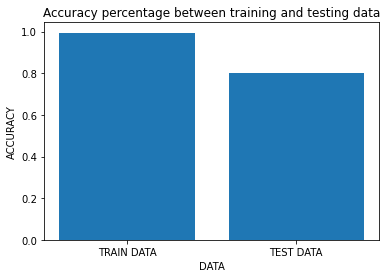

In [18]:
labels = ['TRAIN DATA','TEST DATA']
values = [train_data_accuracy, test_data_accuracy]
plt.bar(labels, values)
plt.title('Accuracy percentage between training and testing data')
plt.xlabel('DATA')
plt.ylabel('ACCURACY')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cf_matrix = confusion_matrix(Y_test, prediction_test)

print(cf_matrix)

[[33  6]
 [10 32]]


In [21]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

33 6 10 32


<AxesSubplot:>

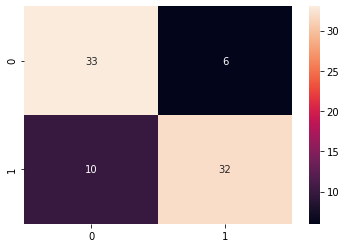

In [22]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# Classification report

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(Y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        39
           1       0.84      0.76      0.80        42

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81

